In [2]:
pip install numpy pandas matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


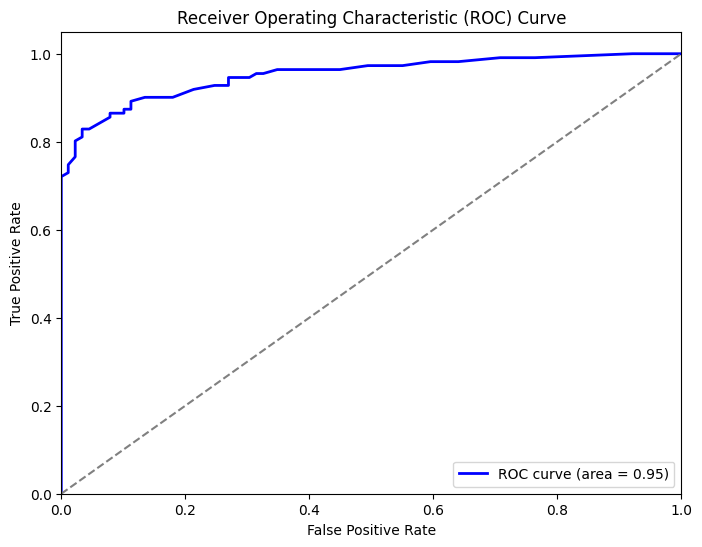

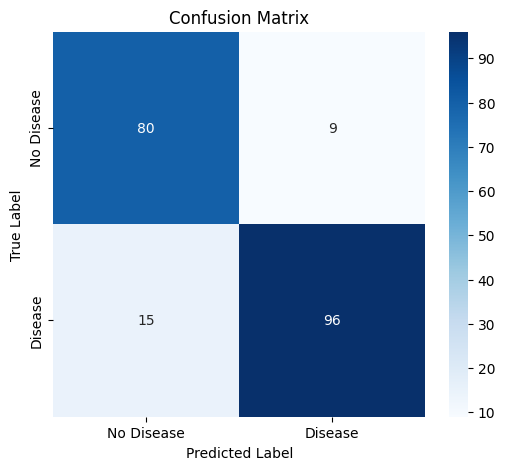

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        89
           1       0.91      0.86      0.89       111

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

# Load sample healthcare dataset (Replace this with actual healthcare data)
# Assume 'outcome' is the target variable (1 = Disease, 0 = No Disease)
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1
y_preds = model.predict(X_test)  # Get class predictions

# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_preds)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print Classification Report
print("Classification Report:\n", classification_report(y_test, y_preds))


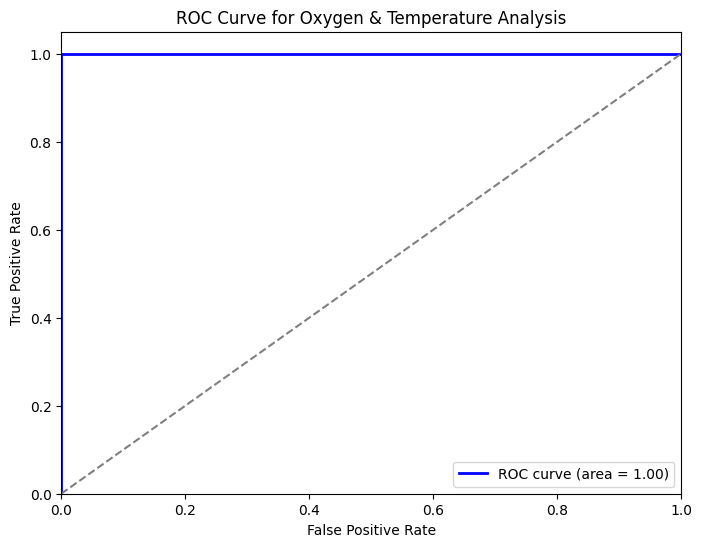

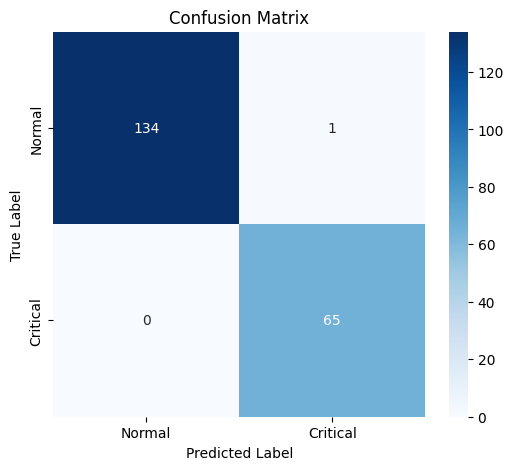

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       135
           1       0.98      1.00      0.99        65

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

# Simulate a Healthcare Dataset (Oxygen Level, Temperature, and Critical Condition)
np.random.seed(42)
num_samples = 1000

# Simulating oxygen saturation levels (SpO2) in %
oxygen_levels = np.random.normal(loc=95, scale=3, size=num_samples)  # Normal range: 95-100%
oxygen_levels = np.clip(oxygen_levels, 80, 100)  # Clipping to realistic values

# Simulating body temperature in Fahrenheit
temperature = np.random.normal(loc=98.6, scale=1.5, size=num_samples)  # Normal: 97-99°F
temperature = np.clip(temperature, 95, 104)  # Clipping to realistic values

# Simulating the critical condition (1 = Critical, 0 = Normal)
critical_condition = ((oxygen_levels < 92) | (temperature > 100)).astype(int)

# Create a DataFrame
data = pd.DataFrame({'Oxygen_Level': oxygen_levels, 'Temperature': temperature, 'Critical_Condition': critical_condition})

# Splitting Data into Train & Test
X = data[['Oxygen_Level', 'Temperature']]
y = data['Critical_Condition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict Probabilities and Classes
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (Critical)
y_preds = model.predict(X_test)  # Class predictions

# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Oxygen & Temperature Analysis')
plt.legend(loc='lower right')
plt.show()

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_preds)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Critical'], yticklabels=['Normal', 'Critical'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print Classification Report
print("Classification Report:\n", classification_report(y_test, y_preds))


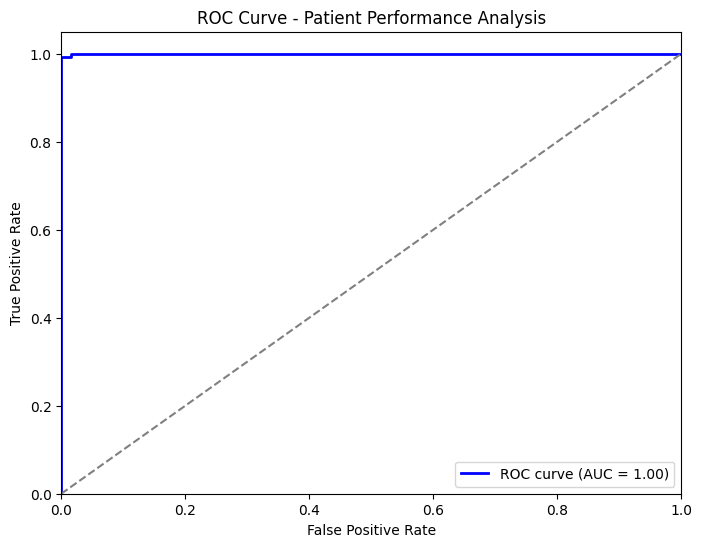

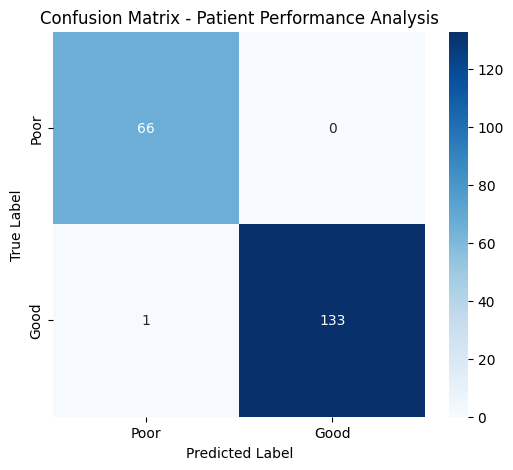

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        66
           1       1.00      0.99      1.00       134

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

# Set random seed for reproducibility
np.random.seed(42)
num_samples = 1000

# Simulate Patient Data
oxygen_levels = np.random.normal(loc=95, scale=3, size=num_samples)  # Oxygen saturation (SpO2)
oxygen_levels = np.clip(oxygen_levels, 80, 100)

temperature = np.random.normal(loc=98.6, scale=1.5, size=num_samples)  # Body temperature (F)
temperature = np.clip(temperature, 95, 104)

heart_rate = np.random.normal(loc=75, scale=10, size=num_samples)  # Heart rate (bpm)
heart_rate = np.clip(heart_rate, 50, 140)

age = np.random.randint(20, 90, num_samples)  # Patient age (20 to 90 years)

blood_groups = np.random.choice(['A', 'B', 'AB', 'O'], num_samples)  # Blood groups

# Simulating overall health performance score (0 = Poor, 1 = Good)
overall_performance = ((oxygen_levels > 92) & (temperature < 100) & (heart_rate < 100)).astype(int)

# Create DataFrame
data = pd.DataFrame({
    'Oxygen_Level': oxygen_levels,
    'Temperature': temperature,
    'Heart_Rate': heart_rate,
    'Age': age,
    'Blood_Group': blood_groups,
    'Overall_Performance': overall_performance
})

# Encode Blood Group (Categorical Feature)
label_encoder = LabelEncoder()
data['Blood_Group'] = label_encoder.fit_transform(data['Blood_Group'])

# Splitting Data
X = data[['Oxygen_Level', 'Temperature', 'Heart_Rate', 'Age', 'Blood_Group']]
y = data['Overall_Performance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions & Probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (Good Performance)
y_preds = model.predict(X_test)  # Class predictions

# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Patient Performance Analysis')
plt.legend(loc='lower right')
plt.show()

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_preds)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Poor', 'Good'], yticklabels=['Poor', 'Good'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Patient Performance Analysis')
plt.show()

# Print Classification Report
print("Classification Report:\n", classification_report(y_test, y_preds))


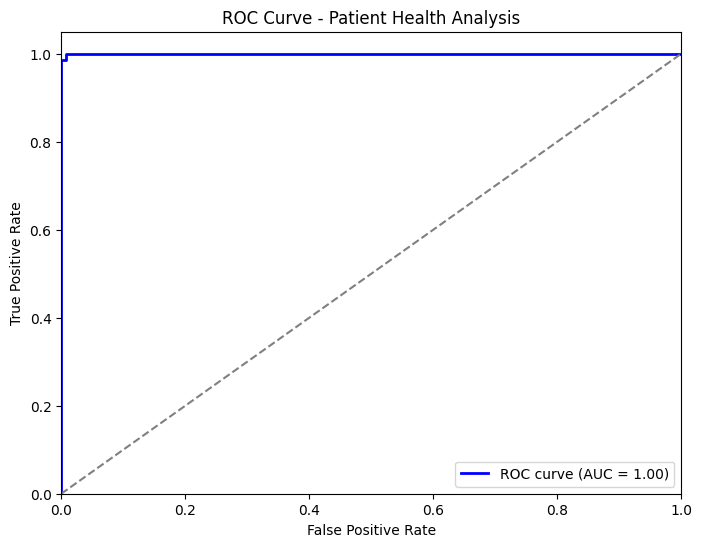

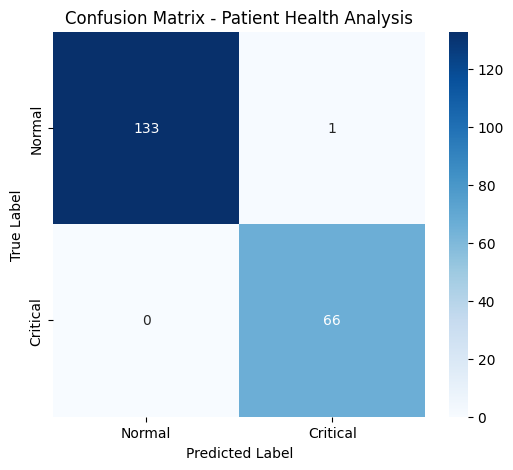

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       134
           1       0.99      1.00      0.99        66

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

# Set random seed for reproducibility
np.random.seed(42)
num_samples = 1000

# Simulating Patient Data
oxygen_levels = np.random.normal(loc=95, scale=3, size=num_samples)  # Oxygen saturation (SpO₂)
oxygen_levels = np.clip(oxygen_levels, 80, 100)

temperature = np.random.normal(loc=98.6, scale=1.5, size=num_samples)  # Body temperature (°F)
temperature = np.clip(temperature, 95, 104)

heart_rate = np.random.normal(loc=75, scale=10, size=num_samples)  # Heart rate (bpm)
heart_rate = np.clip(heart_rate, 50, 140)

age = np.random.randint(20, 90, num_samples)  # Patient age (20 to 90 years)

blood_groups = np.random.choice(['A', 'B', 'AB', 'O'], num_samples)  # Blood groups

# Define Critical Condition (1 = Critical, 0 = Normal)
critical_condition = ((oxygen_levels < 92) | (temperature > 100) | (heart_rate > 100)).astype(int)

# Create DataFrame
data = pd.DataFrame({
    'Oxygen_Level': oxygen_levels,
    'Temperature': temperature,
    'Heart_Rate': heart_rate,
    'Age': age,
    'Blood_Group': blood_groups,
    'Critical_Condition': critical_condition
})

# Encode Blood Group (Categorical Feature)
label_encoder = LabelEncoder()
data['Blood_Group'] = label_encoder.fit_transform(data['Blood_Group'])

# Splitting Data
X = data[['Oxygen_Level', 'Temperature', 'Heart_Rate', 'Age', 'Blood_Group']]
y = data['Critical_Condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions & Probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (Critical)
y_preds = model.predict(X_test)  # Class predictions

# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Patient Health Analysis')
plt.legend(loc='lower right')
plt.show()

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_preds)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Critical'], yticklabels=['Normal', 'Critical'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Patient Health Analysis')
plt.show()

# Print Classification Report
print("Classification Report:\n", classification_report(y_test, y_preds))


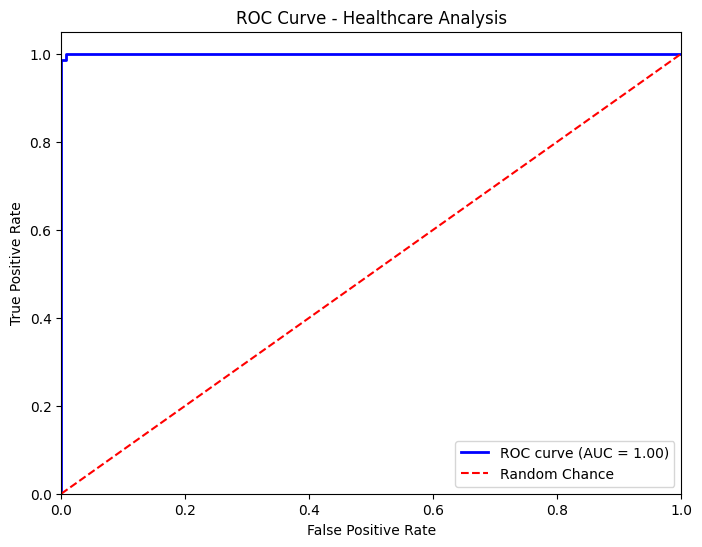

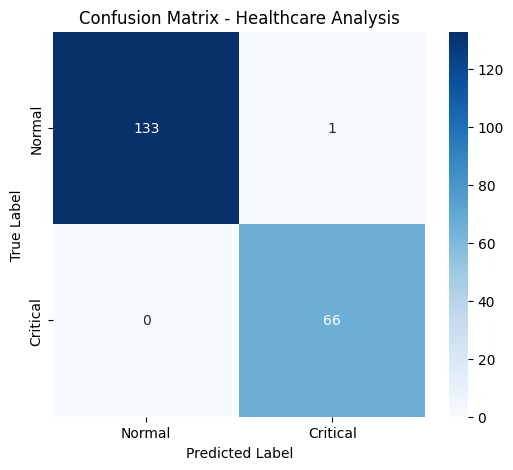

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       134
           1       0.99      1.00      0.99        66

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

# Set random seed for reproducibility
np.random.seed(42)
num_samples = 1000

# Simulating Patient Data
oxygen_levels = np.random.normal(loc=95, scale=3, size=num_samples)  # Oxygen saturation (SpO₂)
oxygen_levels = np.clip(oxygen_levels, 80, 100)

temperature = np.random.normal(loc=98.6, scale=1.5, size=num_samples)  # Body temperature (°F)
temperature = np.clip(temperature, 95, 104)

heart_rate = np.random.normal(loc=75, scale=10, size=num_samples)  # Heart rate (bpm)
heart_rate = np.clip(heart_rate, 50, 140)

age = np.random.randint(20, 90, num_samples)  # Patient age (20 to 90 years)

blood_groups = np.random.choice(['A', 'B', 'AB', 'O'], num_samples)  # Blood groups

# Define Critical Condition (1 = Critical, 0 = Normal)
critical_condition = ((oxygen_levels < 92) | (temperature > 100) | (heart_rate > 100)).astype(int)

# Create DataFrame
data = pd.DataFrame({
    'Oxygen_Level': oxygen_levels,
    'Temperature': temperature,
    'Heart_Rate': heart_rate,
    'Age': age,
    'Blood_Group': blood_groups,
    'Critical_Condition': critical_condition
})

# Encode Blood Group (Categorical Feature)
label_encoder = LabelEncoder()
data['Blood_Group'] = label_encoder.fit_transform(data['Blood_Group'])

# Splitting Data
X = data[['Oxygen_Level', 'Temperature', 'Heart_Rate', 'Age', 'Blood_Group']]
y = data['Critical_Condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions & Probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (Critical)
y_preds = model.predict(X_test)  # Class predictions

# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve with Random Chance Line
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Chance')  # Baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Healthcare Analysis')
plt.legend(loc='lower right')
plt.show()

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_preds)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Critical'], yticklabels=['Normal', 'Critical'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Healthcare Analysis')
plt.show()

# Print Classification Report
print("Classification Report:\n", classification_report(y_test, y_preds))
